# Scikit-learn Project


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

The original dataset for credit card fraudulent transactions is truncated to 10 features and 1968 sample.

In [23]:
data = pd.read_csv('ccfraud_10_features_1968.csv')

The data in the form of Pandas dataframe is shuffled, divided into train features, train labels, test features, and test labels.

In [24]:
def data_prep(data_frame):
    
    if len(data_frame.columns) == 12:
        data = data_frame.iloc[:, 1:]   # weird glitch with additional column. Drop the first column
    shuffled = data.sample(frac=1)      # shuffle data
    features = shuffled.iloc[:, :-1]    # select only the features by dropping the last column
    labels = shuffled.iloc[:, -1]       # select only the labels by selecting the last column
    
    # convert data to numpy array to use train and test split using scikitlearn
    features_np = features.to_numpy(dtype=np.float32)
    labels_np = labels.to_numpy(dtype=np.int32)
    
    # split data into train and test, features and labels
    X_train, X_test, y_train, y_test = train_test_split(features_np, labels_np, test_size=0.2, random_state=42)
        
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = data_prep(data)

In [4]:
# Now we are ready to apply machine learning algorithms.

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

import matplotlib.pyplot as plt

from sklearn import svm, metrics

The above classifiers from Scikit-learn are used and GaussianProcessClassifier performed the best.

In [6]:
clf = SVC(gamma=0.5)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.5):
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       301
           1       0.97      0.63      0.77        93

    accuracy                           0.91       394
   macro avg       0.93      0.81      0.85       394
weighted avg       0.91      0.91      0.90       394




In [9]:
k_clf = KNeighborsClassifier(3)
k_clf.fit(X_train, y_train)
predicted = k_clf.predict(X_test)

print(
    f"Classification report for classifier {k_clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier KNeighborsClassifier(n_neighbors=3):
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       301
           1       0.95      0.87      0.91        93

    accuracy                           0.96       394
   macro avg       0.96      0.93      0.94       394
weighted avg       0.96      0.96      0.96       394




In [10]:
s_clf = SVC(gamma=2, C=1)
s_clf.fit(X_train, y_train)
predicted = s_clf.predict(X_test)

print(
    f"Classification report for classifier {s_clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(C=1, gamma=2):
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       301
           1       0.92      0.12      0.21        93

    accuracy                           0.79       394
   macro avg       0.85      0.56      0.54       394
weighted avg       0.82      0.79      0.72       394




In [21]:
g_clf = GaussianProcessClassifier(1.0 * RBF(1.0))
g_clf.fit(X_train, y_train)
predicted = g_clf.predict(X_test)

print(
    f"Classification report for classifier {g_clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1)):
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       301
           1       0.97      0.92      0.95        93

    accuracy                           0.97       394
   macro avg       0.97      0.96      0.96       394
weighted avg       0.97      0.97      0.97       394




The confusion matrix captures true positive, true negative, false positive, and false negative. Here we have seven false negative and three false positive.

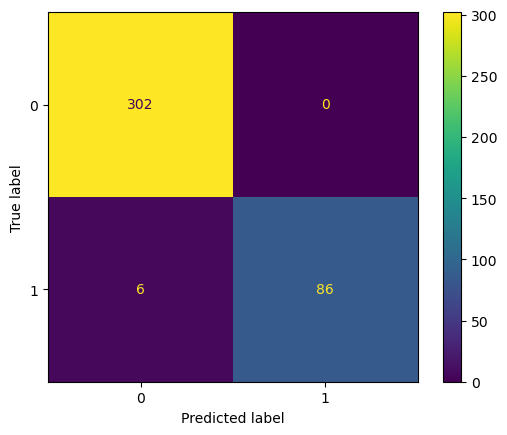

In [25]:
plot_confusion_matrix(g_clf, X_test, y_test) 
plt.show()

In [12]:
d_clf = DecisionTreeClassifier(max_depth=5)
d_clf.fit(X_train, y_train)
predicted = d_clf.predict(X_test)

print(
    f"Classification report for classifier {d_clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier DecisionTreeClassifier(max_depth=5):
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       301
           1       0.94      0.89      0.92        93

    accuracy                           0.96       394
   macro avg       0.96      0.94      0.95       394
weighted avg       0.96      0.96      0.96       394




In [13]:
r_clf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
r_clf.fit(X_train, y_train)
predicted = r_clf.predict(X_test)

print(
    f"Classification report for classifier {r_clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier RandomForestClassifier(max_depth=5, max_features=1, n_estimators=10):
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       301
           1       0.95      0.85      0.90        93

    accuracy                           0.95       394
   macro avg       0.95      0.92      0.93       394
weighted avg       0.95      0.95      0.95       394




In [14]:
m_clf = MLPClassifier(alpha=1, max_iter=1000)
m_clf.fit(X_train, y_train)
predicted = m_clf.predict(X_test)

print(
    f"Classification report for classifier {m_clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier MLPClassifier(alpha=1, max_iter=1000):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       301
           1       0.95      0.90      0.93        93

    accuracy                           0.97       394
   macro avg       0.96      0.94      0.95       394
weighted avg       0.97      0.97      0.97       394




In [16]:
a_clf = AdaBoostClassifier()
a_clf.fit(X_train, y_train)
predicted = a_clf.predict(X_test)

print(
    f"Classification report for classifier {a_clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier AdaBoostClassifier():
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       301
           1       0.95      0.92      0.93        93

    accuracy                           0.97       394
   macro avg       0.96      0.95      0.96       394
weighted avg       0.97      0.97      0.97       394




In [17]:
b_clf = GaussianNB()
b_clf.fit(X_train, y_train)
predicted = b_clf.predict(X_test)

print(
    f"Classification report for classifier {b_clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier GaussianNB():
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       301
           1       0.91      0.78      0.84        93

    accuracy                           0.93       394
   macro avg       0.92      0.88      0.90       394
weighted avg       0.93      0.93      0.93       394




In [18]:
q_clf = QuadraticDiscriminantAnalysis()
q_clf.fit(X_train, y_train)
predicted = q_clf.predict(X_test)

print(
    f"Classification report for classifier {q_clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier QuadraticDiscriminantAnalysis():
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       301
           1       0.88      0.86      0.87        93

    accuracy                           0.94       394
   macro avg       0.92      0.91      0.91       394
weighted avg       0.94      0.94      0.94       394


